In [1]:
import pandas as pd
import numpy as np

from util_desafio import log_retorno,calc_score

In [3]:
df = pd.read_csv("data/test/valores_ano.csv")
df.pop("Date")
df.head(2)

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,156.479996,18.75,236.779999,182.009995,135.419998,132.619995,366.290009,139.039993,407.209991,564.369995,...,87.769997,67.940002,63.540001,56.889999,116.889999,136.529999,125.368935,583.900024,64.239998,234.029999
1,151.190002,19.02,237.050003,179.699997,135.160004,131.360001,361.589996,135.770004,404.299988,554.000000,...,87.489998,68.370003,65.930000,57.180000,118.129997,137.259995,126.640778,587.599976,66.070000,225.119995


In [51]:
df_treino = df.iloc[:-20,:]
df_real = df.iloc[-20:,:]

print(df_treino.shape)
print(df_real.shape)

(178, 503)
(20, 503)


In [125]:
import plotly.graph_objects as go

time_x = [k for k in range(df_treino["A"].shape[0])]
#time_y = [k + time_x[-1] for k in range(df_treino["A"].shape[0])]

fig = go.Figure()

In [123]:
from sktime.forecasting.theta import ThetaForecaster

tforecaster = ThetaForecaster(sp=20)
tforecaster.fit(df_treino["ABBV"])

ThetaForecaster(sp=20)

In [126]:
horizon = 20
origem  = df_treino["ABBV"].shape[0]
fh = np.arange(origem, origem + horizon)

y_tpred = tforecaster.predict(fh)

fig.add_trace(
    go.Scatter(
        x = time_x,
        y = df_treino["ABBV"],
        name="Antigo"
    )
)

fig.add_trace(
    go.Scatter(
        x = fh,
        y = y_tpred,
        name="Previsto"
    )
)

fig.add_trace(
    go.Scatter(
        x = fh,
        y = df_real["ABBV"],
        name="Real"
    )
)


In [66]:
LR_previsto = log_retorno(pd.DataFrame(y_tpred).reset_index(drop=True), pd.DataFrame(df_treino["A"].iloc[-20:]).reset_index(drop=True))
LR_real = log_retorno(pd.DataFrame(df_real["A"]).reset_index(drop=True), pd.DataFrame(df_treino["A"].iloc[-20:]).reset_index(drop=True))

In [67]:
calc_score(LR_previsto,LR_real)

0.054452681126586265

In [69]:
from prophet import Prophet

In [ ]:
import cmdstanpy
cmdstanpy.install_cmdstan()
cmdstanpy.install_cmdstan(compiler=True)

In [155]:
df_prophet = pd.read_csv("data/test/valores_ano.csv")

df_prophet_real = df_prophet[['Date','A']].iloc[-20:]
df_prophet = df_prophet[['Date','A']].iloc[:-20]
df_prophet.columns =  ['ds', 'y']

22:29:39 - cmdstanpy - INFO - Chain [1] start processing
22:29:39 - cmdstanpy - INFO - Chain [1] done processing


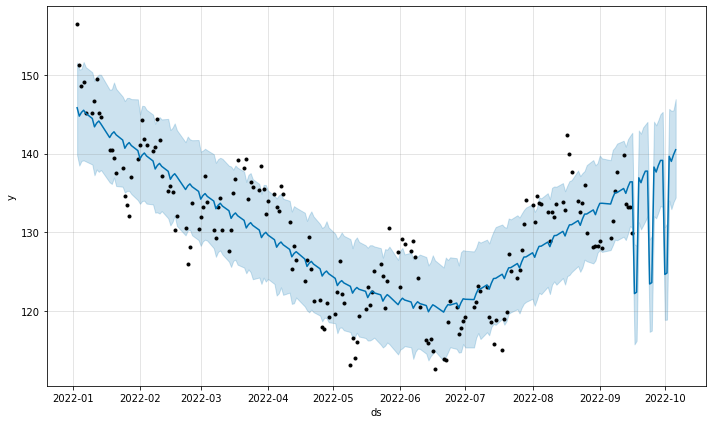

In [156]:
m = Prophet()
#m.add_country_holidays(country_name='US')
m.fit(df_prophet)
future = m.make_future_dataframe(20, freq='D')
forecast = m.predict(future)
fig = m.plot(forecast)

In [157]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = time_x,
        y = df_treino["A"],
        name="Antigo"
    )
)

fig.add_trace(
    go.Scatter(
        x = fh,
        y = forecast[['yhat']].iloc[-20:,0],
        name="Previsto"
    )
)

fig.add_trace(
    go.Scatter(
        x = fh,
        y = df_real["A"],
        name="Real"
    )
)

In [114]:
teste = forecast[['yhat']].iloc[-20:]
teste["A"] = forecast[['yhat']].iloc[-20:]
teste.pop("yhat")
teste.reset_index(drop=True, inplace=True)

LR_previsto = log_retorno(teste, pd.DataFrame(df_treino["A"].iloc[-20:]).reset_index(drop=True))
LR_real = log_retorno(pd.DataFrame(df_real["A"]).reset_index(drop=True), pd.DataFrame(df_treino["A"].iloc[-20:]).reset_index(drop=True))

calc_score(LR_previsto,LR_real)

0.1131458824476288

In [136]:
teste = pd.DataFrame([127.104546, 127.104546, 127.104546, 127.104546, 127.104546,
       126.31828 , 126.31828 , 126.31828 , 126.31828 , 125.10579 ,
       127.104546, 127.104546, 127.104546, 127.104546, 127.104546,
       127.104546, 127.104546, 127.104546, 127.104546, 127.104546])

teste["A"] = teste[0]
teste.pop(0)


fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = time_x,
        y = df_treino["A"],
        name="Antigo"
    )
)

fig.add_trace(
    go.Scatter(
        x = fh,
        y = teste.iloc[-20:,0],
        name="Previsto"
    )
)

fig.add_trace(
    go.Scatter(
        x = fh,
        y = df_real["A"],
        name="Real"
    )
)

In [137]:

teste.reset_index(drop=True, inplace=True)

LR_previsto = log_retorno(teste, pd.DataFrame(df_treino["A"].iloc[-20:]).reset_index(drop=True))
LR_real = log_retorno(pd.DataFrame(df_real["A"]).reset_index(drop=True), pd.DataFrame(df_treino["A"].iloc[-20:]).reset_index(drop=True))

calc_score(LR_previsto,LR_real)

0.03440896559152785

In [128]:
hyper_param_list = [20, 30, 45, 50, 60, 75]
model_score = {}

for col in df_treino.columns[:15]:
    aux_score = 100
    aux_hyper = 100

    for hyper_param in hyper_param_list:

        tforecaster = ThetaForecaster(sp=hyper_param)
        tforecaster.fit(df_treino[col])

        horizon = 20
        origem  = df_treino[col].shape[0]
        fh = np.arange(origem, origem + horizon)

        y_tpred = tforecaster.predict(fh)
        LR_previsto = log_retorno(pd.DataFrame(y_tpred).reset_index(drop=True), pd.DataFrame(df_treino[col].iloc[-20:]).reset_index(drop=True))
        LR_real = log_retorno(pd.DataFrame(df_real[col]).reset_index(drop=True), pd.DataFrame(df_treino[col].iloc[-20:]).reset_index(drop=True))

        score = calc_score(LR_previsto,LR_real)

        if aux_score > score:
            aux_score = score
            aux_hyper = hyper_param

    model_score[col] = [aux_hyper,aux_score]

model_score

{'A': [30, 0.037359614985266756],
 'AAL': [45, 0.09736863832493824],
 'AAP': [75, 0.12976904173839],
 'AAPL': [50, 0.05957284032541039],
 'ABBV': [20, 0.028452028183833997],
 'ABC': [20, 0.04057505030979142],
 'ABMD': [75, 0.07333978275921207],
 'ABT': [45, 0.07992194374585612],
 'ACN': [50, 0.0889501483994502],
 'ADBE': [45, 0.16734378563641472],
 'ADI': [30, 0.05061857557822445],
 'ADM': [60, 0.048314650187516676],
 'ADP': [20, 0.09260435049459781],
 'ADSK': [45, 0.07757766394754288],
 'AEE': [50, 0.17039359075633345]}

In [138]:
import xgboost as xgb

In [139]:
def create_features(df, label=None):
    df = df.set_index(df.ds)
    df['ds'] = pd.to_datetime(df.ds, format='%Y-%m-%d')
    df['date'] = df.index
    df['dayofweek'] = df['ds'].dt.dayofweek
    df['quarter'] = df['ds'].dt.quarter
    df['month'] = df['ds'].dt.month
    df['year'] = df['ds'].dt.year
    df['dayofyear'] = df['ds'].dt.dayofyear
    df['dayofmonth'] = df['ds'].dt.day
    df['weekofyear'] = df['ds'].dt.weekofyear
    df['pir'] = (df['ds'] - pd.to_datetime('2022-01-03', format='%Y-%m-%d')).dt.days
    
    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','pir']]
    if label:
        y = df[label]
        return X, y
    return X

In [144]:
df_prophet_real = pd.read_csv("data/test/valores_ano.csv")[['Date','A']]
df_prophet_real.columns =  ['ds', 'y']
df_prophet = df_prophet_real.iloc[:-20]

In [145]:
df_features = create_features(df_prophet_real)
X_train = df_features.iloc[:-20]
X_test = df_features.iloc[-20:]

y_train = df_prophet_real['y'].iloc[:-20]
y_test = df_prophet_real['y'].iloc[-20:]

<ipython-input-139-f3436422d025>:11: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [146]:
X_train = df_features.iloc[:-20]
X_test = df_features.iloc[-20:]

xgb_model = xgb.XGBRegressor(n_estimators=1000)
xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=1000, verbose=False)
xgb_pred = xgb_model.predict(X_test)

In [147]:
xgb_pred

array([126.55958, 126.55958, 126.55958, 126.55958, 126.55958, 126.55958,
       126.55958, 126.55958, 126.55958, 124.6977 , 126.55958, 126.55958,
       126.55958, 126.55958, 126.55958, 126.55958, 126.55958, 126.55958,
       126.55958, 126.55958], dtype=float32)

In [148]:
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

# Support Vector Regression
svr_model2 = svm.SVR(kernel='linear') # Linear Kernel
svr_model2.fit(X_train, y_train)
svr = svr_model2.predict(X_test)


# Decision Tree Regressor
dct_model = tree.DecisionTreeRegressor()
dct_model = dct_model.fit(X_train, y_train)
dct = dct_model.predict(X_test)


# Random Forest Regressor
rfr_model2 = RandomForestRegressor(n_estimators = 10000)
rfr_model2.fit(X_train, y_train)
rfr = rfr_model2.predict(X_test)

In [152]:
teste = pd.DataFrame(svr)

teste["A"] = teste[0]
teste.pop(0)


teste.reset_index(drop=True, inplace=True)

LR_previsto = log_retorno(teste, pd.DataFrame(df_treino["A"].iloc[-20:]).reset_index(drop=True))
LR_real = log_retorno(pd.DataFrame(df_real["A"]).reset_index(drop=True), pd.DataFrame(df_treino["A"].iloc[-20:]).reset_index(drop=True))

print(calc_score(LR_previsto,LR_real))

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = time_x,
        y = df_treino["A"],
        name="Antigo"
    )
)

fig.add_trace(
    go.Scatter(
        x = fh,
        y = teste.iloc[-20:,0],
        name="Previsto"
    )
)

fig.add_trace(
    go.Scatter(
        x = fh,
        y = df_real["A"],
        name="Real"
    )
)

0.04124339183050068


In [153]:
teste = pd.DataFrame(dct)

teste["A"] = teste[0]
teste.pop(0)

teste.reset_index(drop=True, inplace=True)

LR_previsto = log_retorno(teste, pd.DataFrame(df_treino["A"].iloc[-20:]).reset_index(drop=True))
LR_real = log_retorno(pd.DataFrame(df_real["A"]).reset_index(drop=True), pd.DataFrame(df_treino["A"].iloc[-20:]).reset_index(drop=True))

print(calc_score(LR_previsto,LR_real))

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = time_x,
        y = df_treino["A"],
        name="Antigo"
    )
)

fig.add_trace(
    go.Scatter(
        x = fh,
        y = teste.iloc[-20:,0],
        name="Previsto"
    )
)

fig.add_trace(
    go.Scatter(
        x = fh,
        y = df_real["A"],
        name="Real"
    )
)

0.06414884575603508


In [154]:
teste = pd.DataFrame(rfr)

teste["A"] = teste[0]
teste.pop(0)


teste.reset_index(drop=True, inplace=True)

LR_previsto = log_retorno(teste, pd.DataFrame(df_treino["A"].iloc[-20:]).reset_index(drop=True))
LR_real = log_retorno(pd.DataFrame(df_real["A"]).reset_index(drop=True), pd.DataFrame(df_treino["A"].iloc[-20:]).reset_index(drop=True))

print(calc_score(LR_previsto,LR_real))

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = time_x,
        y = df_treino["A"],
        name="Antigo"
    )
)

fig.add_trace(
    go.Scatter(
        x = fh,
        y = teste.iloc[-20:,0],
        name="Previsto"
    )
)

fig.add_trace(
    go.Scatter(
        x = fh,
        y = df_real["A"],
        name="Real"
    )
)

0.05698084139857426


In [160]:
from sklearn.linear_model import LinearRegression

lmr_model =  LinearRegression(normalize=True)
lmr_model.fit(X_train,y_train)
lmr = lmr_model.predict(X_test)


teste = pd.DataFrame(lmr)

teste["A"] = teste[0]
teste.pop(0)


teste.reset_index(drop=True, inplace=True)

LR_previsto = log_retorno(teste, pd.DataFrame(df_treino["A"].iloc[-20:]).reset_index(drop=True))
LR_real = log_retorno(pd.DataFrame(df_real["A"]).reset_index(drop=True), pd.DataFrame(df_treino["A"].iloc[-20:]).reset_index(drop=True))

print(calc_score(LR_previsto,LR_real))

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = time_x,
        y = df_treino["A"],
        name="Antigo"
    )
)

fig.add_trace(
    go.Scatter(
        x = fh,
        y = teste.iloc[-20:,0],
        name="Previsto"
    )
)

fig.add_trace(
    go.Scatter(
        x = fh,
        y = df_real["A"],
        name="Real"
    )
)

0.037165682430945556


In [ ]:
import pmdarima as pm

sar_model = pm.auto_arima(np.array(y_train.values), seasonal = True)
aam = list(sar_model.predict(len(y_test)))

teste = pd.DataFrame(aam)

teste["A"] = teste[0]
teste.pop(0)


teste.reset_index(drop=True, inplace=True)

LR_previsto = log_retorno(teste, pd.DataFrame(df_treino["A"].iloc[-20:]).reset_index(drop=True))
LR_real = log_retorno(pd.DataFrame(df_real["A"]).reset_index(drop=True), pd.DataFrame(df_treino["A"].iloc[-20:]).reset_index(drop=True))

print(calc_score(LR_previsto,LR_real))

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = time_x,
        y = df_treino["A"],
        name="Antigo"
    )
)

fig.add_trace(
    go.Scatter(
        x = fh,
        y = teste.iloc[-20:,0],
        name="Previsto"
    )
)

fig.add_trace(
    go.Scatter(
        x = fh,
        y = df_real["A"],
        name="Real"
    )
)